In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)


# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
engine.execute('select date,prcp from measurement order by date desc limit 1;').fetchall()

[('2017-08-23', 0.0)]

<AxesSubplot:xlabel='date'>

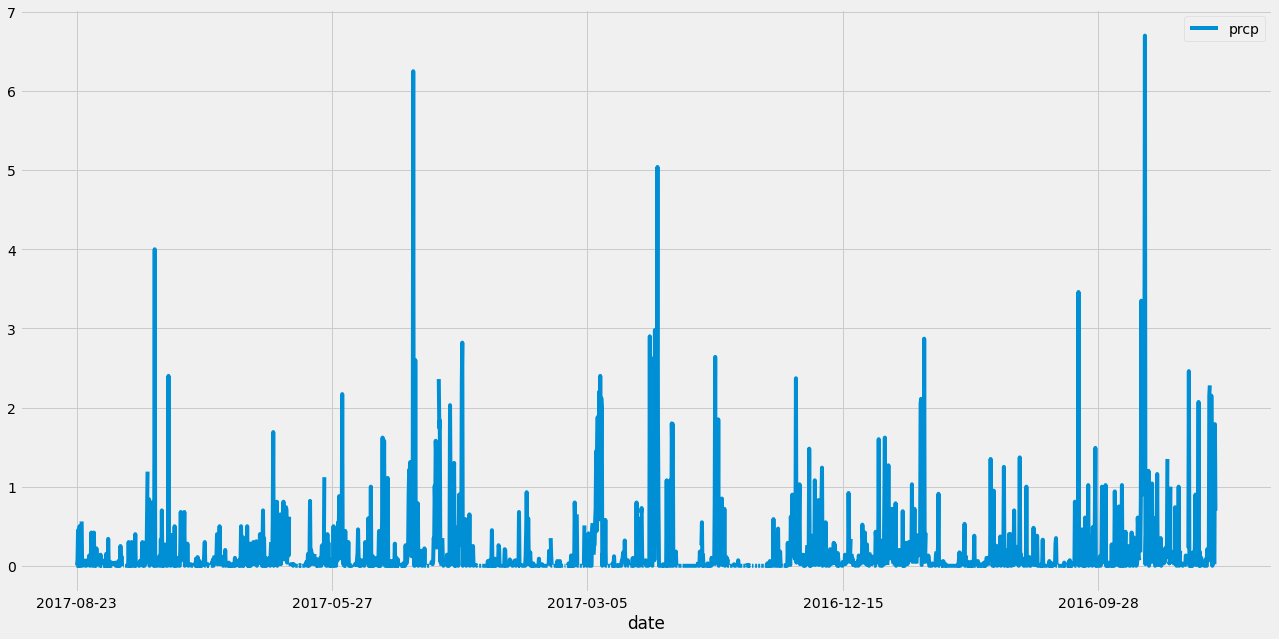

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
result=engine.execute('select date,prcp from measurement where date>="2016-08-23" order by date desc;')

# Save the query results as a Pandas DataFrame and set the index to the date column
Dates=pd.DataFrame(result)
Dates.columns=result.keys()
Dates.set_index('date')

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
Dates.plot(x='date',y='prcp',figsize=(20,10))



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Dates.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
len(engine.execute('select * from station;').fetchall())

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute('select station,count(station) from measurement group by station order by count(station) desc').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
engine.execute('select station,min(tobs),max(tobs),avg(tobs) from measurement where station="USC00519281" group by station').fetchall()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

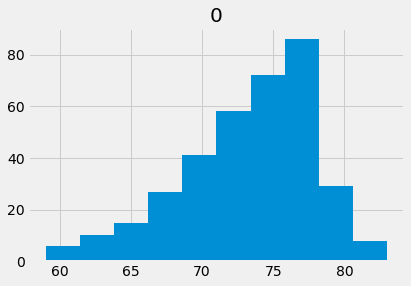

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query=pd.DataFrame(engine.execute('select tobs from measurement where station="USC00519281" and date>="2016-08-23"').fetchall())

query.hist()

# Close session

In [17]:
# Close Session
session.close()